# **Import Libraries**





In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diamonds.csv to diamonds.csv


In [4]:
diamonds = pd.read_csv("diamonds.csv")
print(diamonds)

       Unnamed: 0  carat        cut color  ... price     x     y     z
0               1   0.23      Ideal     E  ...   326  3.95  3.98  2.43
1               2   0.21    Premium     E  ...   326  3.89  3.84  2.31
2               3   0.23       Good     E  ...   327  4.05  4.07  2.31
3               4   0.29    Premium     I  ...   334  4.20  4.23  2.63
4               5   0.31       Good     J  ...   335  4.34  4.35  2.75
...           ...    ...        ...   ...  ...   ...   ...   ...   ...
53935       53936   0.72      Ideal     D  ...  2757  5.75  5.76  3.50
53936       53937   0.72       Good     D  ...  2757  5.69  5.75  3.61
53937       53938   0.70  Very Good     D  ...  2757  5.66  5.68  3.56
53938       53939   0.86    Premium     H  ...  2757  6.15  6.12  3.74
53939       53940   0.75      Ideal     D  ...  2757  5.83  5.87  3.64

[53940 rows x 11 columns]


In [5]:
df = pd.DataFrame.head(diamonds)
print(df)

   Unnamed: 0  carat      cut color clarity  ...  table  price     x     y     z
0           1   0.23    Ideal     E     SI2  ...   55.0    326  3.95  3.98  2.43
1           2   0.21  Premium     E     SI1  ...   61.0    326  3.89  3.84  2.31
2           3   0.23     Good     E     VS1  ...   65.0    327  4.05  4.07  2.31
3           4   0.29  Premium     I     VS2  ...   58.0    334  4.20  4.23  2.63
4           5   0.31     Good     J     SI2  ...   58.0    335  4.34  4.35  2.75

[5 rows x 11 columns]


# **Quick look at data using pandas**

In [6]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
corr_matrix = diamonds.corr()
corr_matrix["price"].sort_values(ascending = False)

price         1.000000
carat         0.921591
x             0.884435
y             0.865421
z             0.861249
table         0.127134
depth        -0.010647
Unnamed: 0   -0.306873
Name: price, dtype: float64

In [9]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [10]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [11]:
diamonds["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

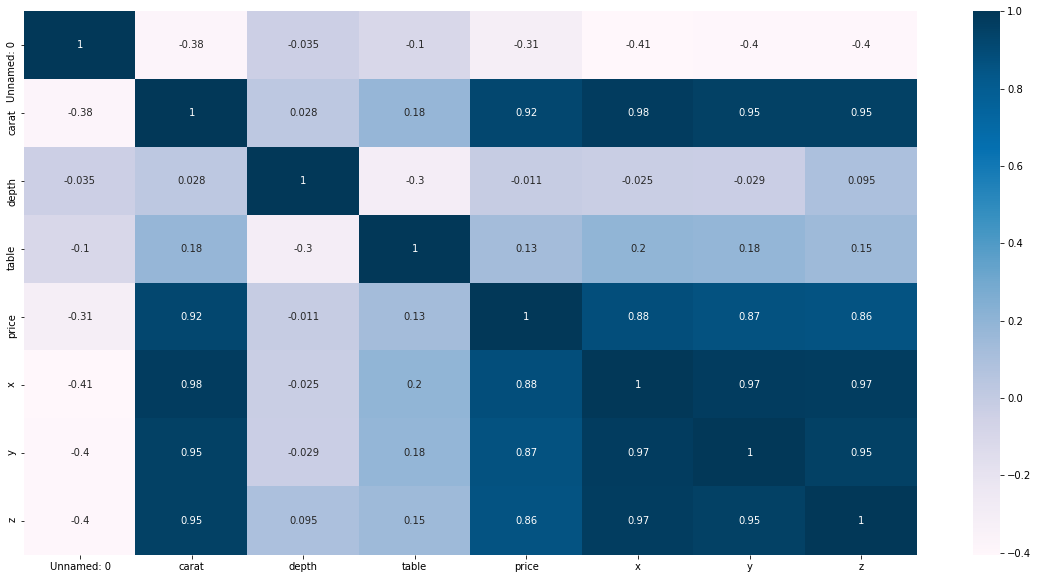

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(diamonds.corr(),cmap='PuBu',annot=True)
plt.show()

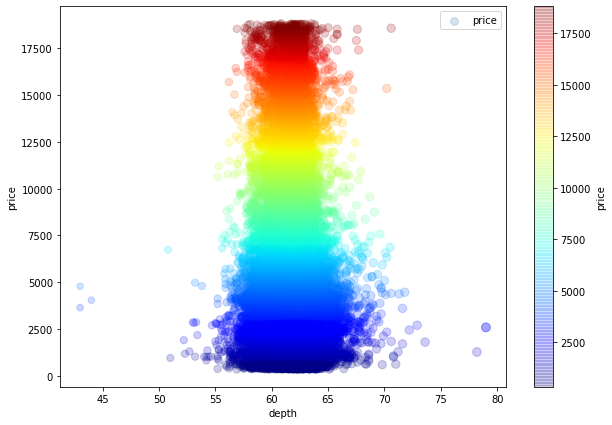

In [14]:
diamonds.plot(kind="scatter", x="depth", y="price", alpha=0.2, s=diamonds["depth"], label="price", figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar= True, sharex=False)
plt.show()

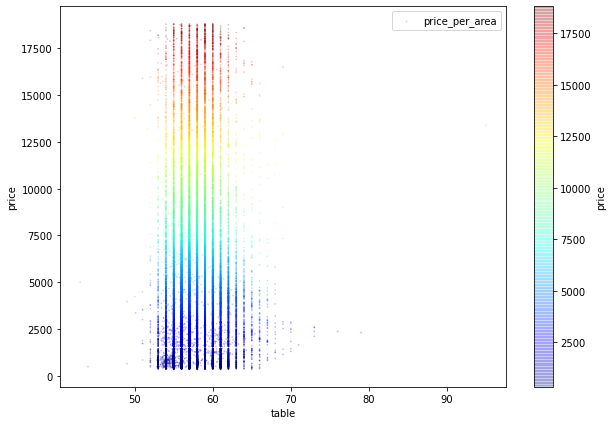

In [15]:

diamonds.plot(kind="scatter", x="table", y="price", alpha=0.2, s=diamonds["table"]/100, label="price_per_area", figsize=(10,7), c="price", cmap=plt.get_cmap("jet"), colorbar= True, sharex=False)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f517ed08a50>,
      dtype=object)

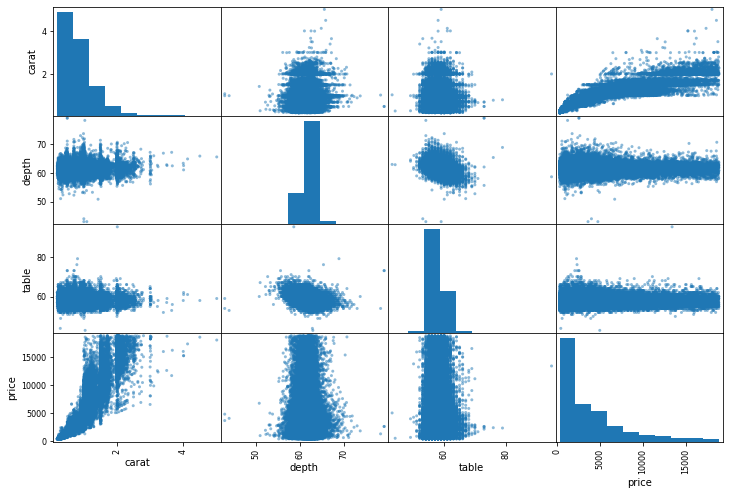

In [16]:
from pandas.plotting import scatter_matrix
atteributes = ["carat", "depth", "table", "price"]
scatter_matrix(diamonds[atteributes], figsize = (12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51761c1ad0>,
      dtype=object)

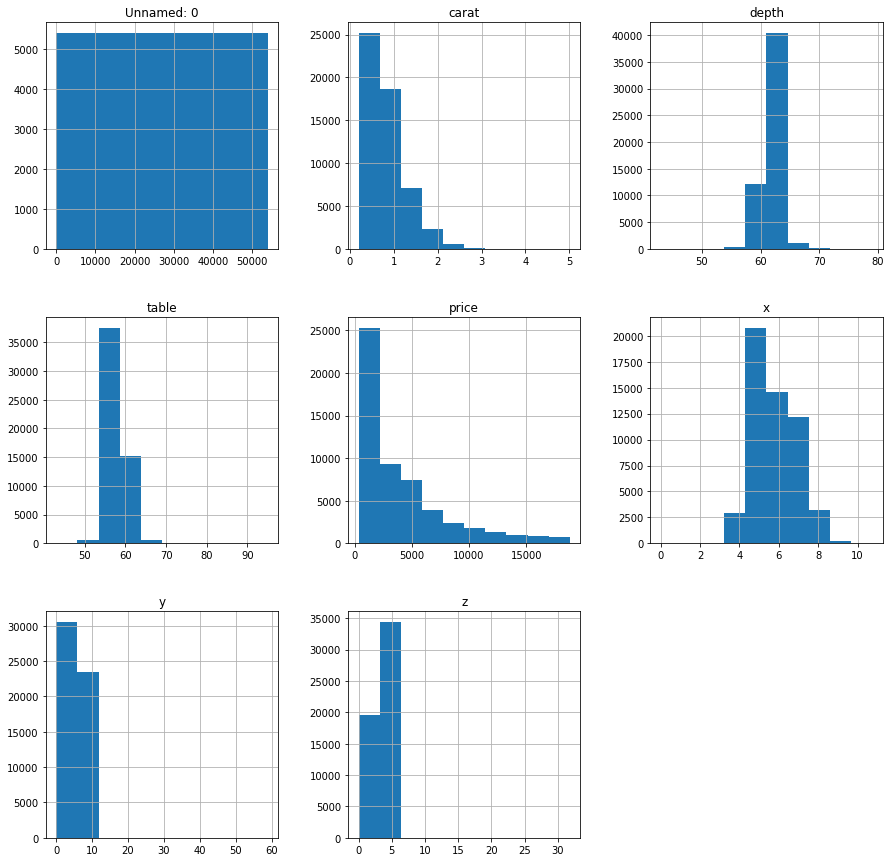

In [17]:
diamonds.hist(figsize=(15,15))

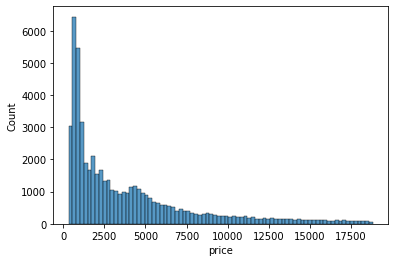

In [18]:
sns.histplot(diamonds.price)


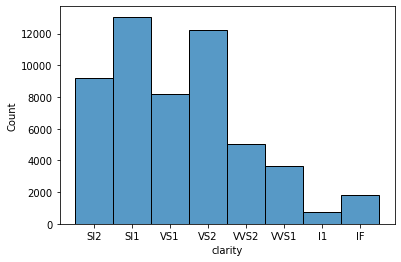

In [19]:
sns.histplot(diamonds.clarity)

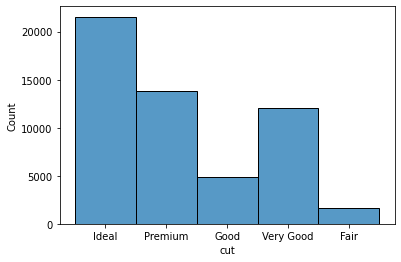

In [20]:
sns.histplot(diamonds.cut)

# **Cleaning Data**

In [21]:
diamonds.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [22]:
zeroes_z = diamonds.loc[diamonds['z'] == 0]
print(zeroes_z)

       Unnamed: 0  carat        cut color  ...  price     x     y    z
2207         2208   1.00    Premium     G  ...   3142  6.55  6.48  0.0
2314         2315   1.01    Premium     H  ...   3167  6.66  6.60  0.0
4791         4792   1.10    Premium     G  ...   3696  6.50  6.47  0.0
5471         5472   1.01    Premium     F  ...   3837  6.50  6.47  0.0
10167       10168   1.50       Good     G  ...   4731  7.15  7.04  0.0
11182       11183   1.07      Ideal     F  ...   4954  0.00  6.62  0.0
11963       11964   1.00  Very Good     H  ...   5139  0.00  0.00  0.0
13601       13602   1.15      Ideal     G  ...   5564  6.88  6.83  0.0
15951       15952   1.14       Fair     G  ...   6381  0.00  0.00  0.0
24394       24395   2.18    Premium     H  ...  12631  8.49  8.45  0.0
24520       24521   1.56      Ideal     G  ...  12800  0.00  0.00  0.0
26123       26124   2.25    Premium     I  ...  15397  8.52  8.42  0.0
26243       26244   1.20    Premium     D  ...  15686  0.00  0.00  0.0
27112 

In [23]:
zeroes_y = diamonds.loc[diamonds['y'] == 0]
print(zeroes_y)

       Unnamed: 0  carat        cut color clarity  ...  table  price    x    y    z
11963       11964   1.00  Very Good     H     VS2  ...   53.0   5139  0.0  0.0  0.0
15951       15952   1.14       Fair     G     VS1  ...   67.0   6381  0.0  0.0  0.0
24520       24521   1.56      Ideal     G     VS2  ...   54.0  12800  0.0  0.0  0.0
26243       26244   1.20    Premium     D    VVS1  ...   59.0  15686  0.0  0.0  0.0
27429       27430   2.25    Premium     H     SI2  ...   59.0  18034  0.0  0.0  0.0
49556       49557   0.71       Good     F     SI2  ...   60.0   2130  0.0  0.0  0.0
49557       49558   0.71       Good     F     SI2  ...   60.0   2130  0.0  0.0  0.0

[7 rows x 11 columns]


In [24]:
diamonds.drop(diamonds.index[diamonds['x'] == 0], inplace = True)
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
zeroes_x = diamonds.loc[diamonds['x'] == 0]
print(zeroes_x)

Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [26]:
(diamonds == 0).sum(axis=0)

Unnamed: 0     0
carat          0
cut            0
color          0
clarity        0
depth          0
table          0
price          0
x              0
y              0
z             12
dtype: int64

In [27]:
diamonds.drop(diamonds.index[diamonds['z'] == 0], inplace = True)
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# **Text and Categorical Attributes**

In [28]:
# using replace function
diamonds.replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace=True)
diamonds.replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}, inplace=True)
diamonds.replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}, inplace=True)

In [29]:
diamonds.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


# **Adding New features**

In [30]:
diamonds['volume'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


# **Split Data**

In [31]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(diamonds, test_size=0.1, random_state=42)

In [32]:
train_set_x=train_set.drop(["price"],axis=1)
train_set_y=train_set["price"]
test_set_x = test_set.drop(["price"],axis=1)
test_set_y = test_set["price"]

# Train Your Model 

###LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_set_x, train_set_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
from sklearn.metrics import mean_squared_error
price_predictions = lin_reg.predict(test_set_x)


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_set_x, train_set_y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())

Mean  1541.3229602400463


Let's Look at the results

In [36]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean", scores.mean())
  print("Standard Deviation", scores.std())
display_scores(rmse_scores)


Scores [1254.04279052 1151.52587816 1305.47909144 1198.33606272 1214.15069037
 1230.83610272 1246.10549086 1193.45182336 1180.85607884 4438.4455934 ]
Mean 1541.3229602400463
Standard Deviation 966.5713316965185


###Random Forest Regressor

Import Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_set_x, train_set_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
price_predictions_forest = forest_reg.predict(test_set_x)

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, train_set_x, train_set_y,scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())

Mean  30.232977559157128


# Fine Your model

Import GridSearchCv

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = [
              {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
] 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring='neg_mean_squared_error', return_train_score = True)
grid_search.fit(train_set_x, train_set_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j